In [2]:
from step9 import *

ddir = f"C:/Users/youzh/Documents/My documents(not synced)/sP_Workflow"
data_sac = f"{ddir}/Download/SAC"
wdir = f"{ddir}/Download/Verified"

if not os.path.exists(wdir):
    os.mkdir(wdir)

['CI.BFS..BHR.SAC.bp.cut', 'CI.BFS..BHT.SAC.bp.cut', 'CI.BFS..BHZ.SAC.bp.cut']
3 Trace(s) in Stream:
CI.BFS..BHR | 2022-01-11T11:41:19.814324Z - 2022-01-11T11:43:37.174324Z | 100.0 Hz, 13737 samples
CI.BFS..BHT | 2022-01-11T11:41:19.814324Z - 2022-01-11T11:43:37.174324Z | 100.0 Hz, 13737 samples
CI.BFS..BHZ | 2022-01-11T11:41:19.814324Z - 2022-01-11T11:43:37.174324Z | 100.0 Hz, 13737 samples 11.57 72.46207


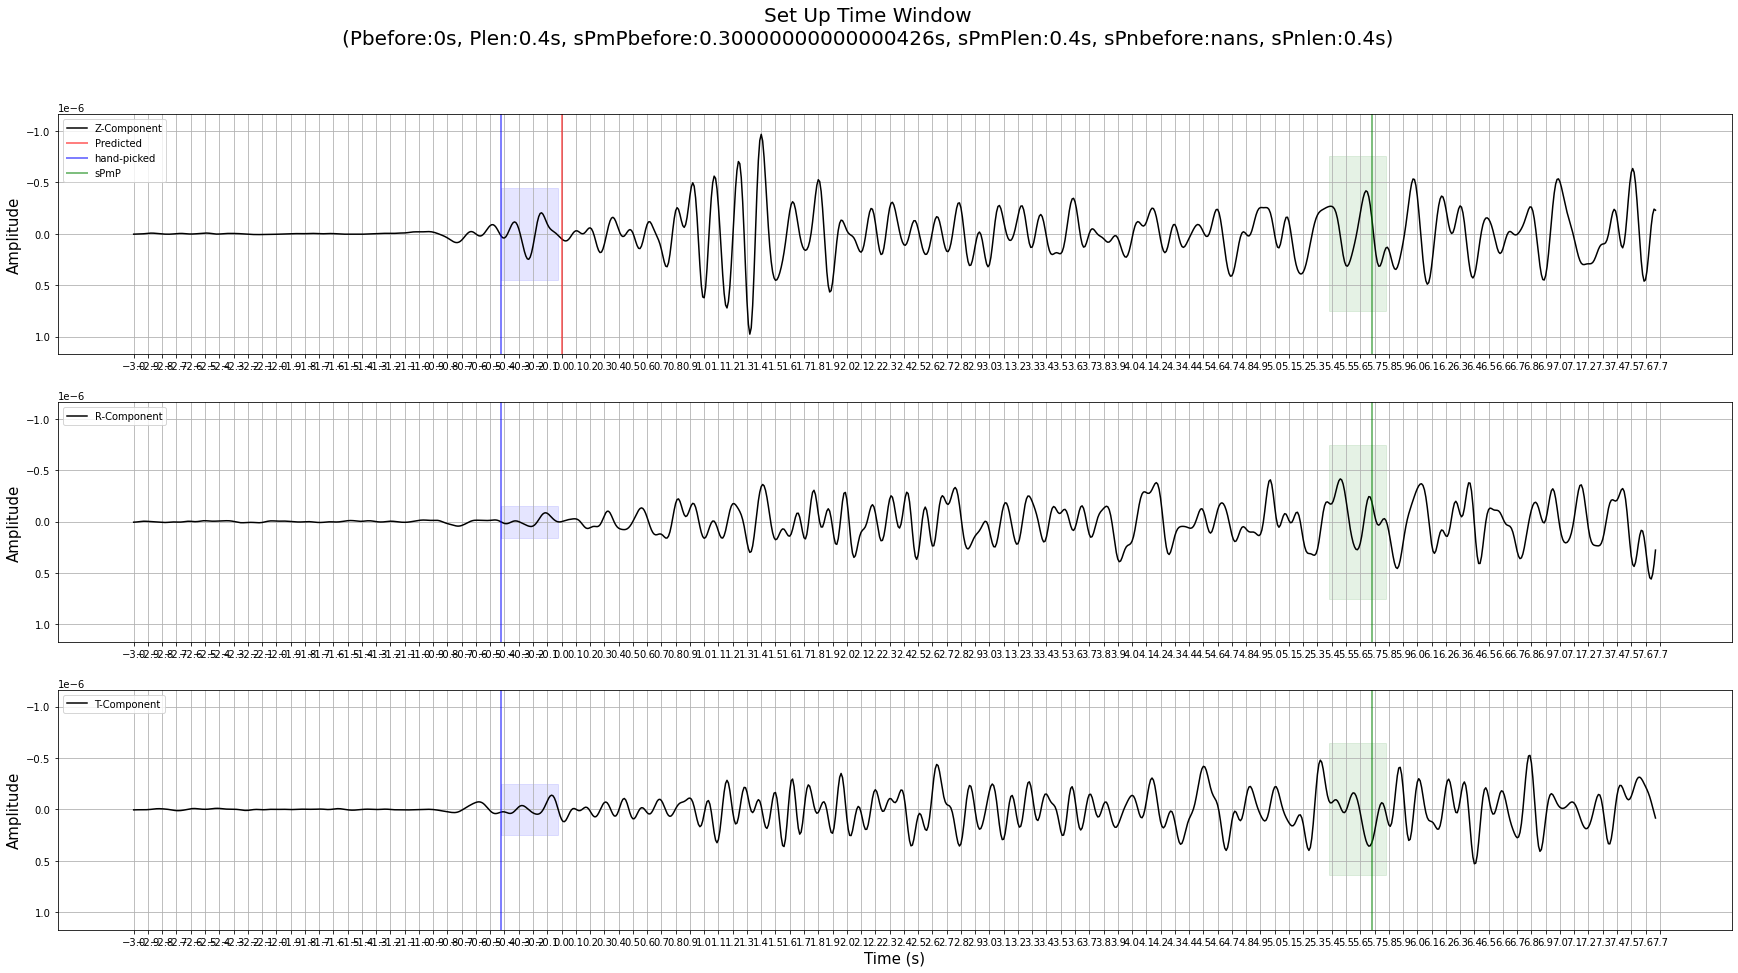

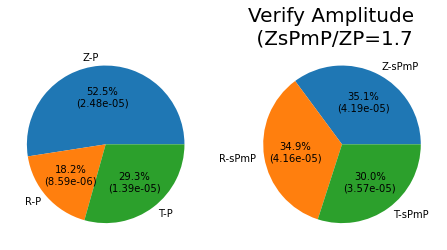

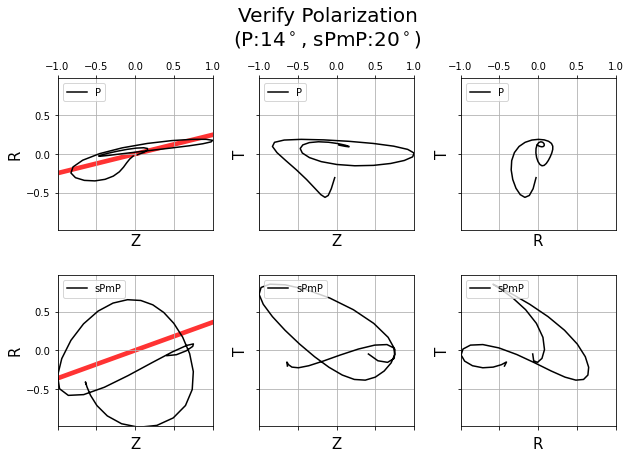

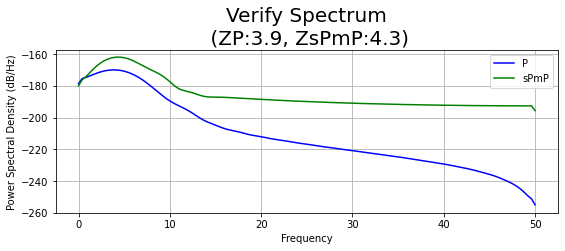

check: 1.Amplitude ratio, 2. Minimal T direction energy, 3. Particle Motion


In [ ]:
### Check the event one by one
evtid =4

with open(f"{ddir}/Others/verify/Autojudge.info","r") as files:
    #print("something")
    for i,file in enumerate(files):
        if i == evtid - 1:
            
            evt = file.split()[1]
            sta = file.split()[2]
            Tp_handpicked = float(file.split()[4])
            Tp = Tp_handpicked
            p_length = float(file.split()[6])
              
            TsPmP = float(file.split()[8])
            TsPmp_autorefined = float(file.split()[10])
            sPmP_length = float(file.split()[12])
            
            TsPn = float(file.split()[14])
            TsPn_autorefined = float(file.split()[16])
            sPn_len = float(file.split()[18])
          
            inpath = os.path.join(data_sac, evt)
            os.chdir(inpath)
            print(glob.glob(f"{sta}*[RTZ].SAC.bp.cut"))

            st = obspy.read(f"{sta}*[RTZ].SAC.bp.cut")
            sachd = st[0].stats.sac
            print(st,sachd["evdp"],sachd["dist"])

        ### tune these parameters to set proper windows
            Tpbefore = 0
            Tplen = p_length
            Tspnbefore = -(TsPn_autorefined -TsPn)
            Tspnlen = sPn_len
            Tspmbefore = -(TsPmp_autorefined - TsPmP)
            Tspmlen = sPmP_length
            

            #print(Tspmbefore)
            
            fig1 = set_window(st, Tp, TsPmP, TsPn, Twbefore=3, Twafter=2, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig2 = vef_amp(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig3 = vef_polaz(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig4 = vef_sptm(st, Tp, TsPmP, TsPn, PN=2**8, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            print("check: 1.Amplitude ratio, 2. Minimal T direction energy, 3. Particle Motion")
            score = input("overall score: a(4 checks), b(3 checks), c(2 checks)")
            if not os.path.exists(f"{wdir}/{evt}"):
                os.mkdir(f"{wdir}/{evt}")
            if score == "a": 
                if not os.path.exists(f"{wdir}/{evt}/A"):
                    os.mkdir(f"{wdir}/{evt}/A")

                pdf = PdfPages(f"{wdir}/{evt}/A/{sta}_analyses.pdf")
            elif score == "b":
                if not os.path.exists(f"{wdir}/{evt}/B"):
                    os.mkdir(f"{wdir}/{evt}/B")

                pdf = PdfPages(f"{wdir}/{evt}/B/{sta}_analyses.pdf")
            elif score == 'c':
                if not os.path.exists(f"{wdir}/{evt}/C"):
                    os.mkdir(f"{wdir}/{evt}/C")

                pdf = PdfPages(f"{wdir}/{evt}/C/{sta}_analyses.pdf")
            
            pdf.savefig(fig1)
            pdf.savefig(fig2)
            pdf.savefig(fig3)
            pdf.savefig(fig4)
            pdf.close()